In [1]:
import ROOT #Start by importing ROOT
import numpy as np
# ROOT.enableJSVis() #need this to make interactive ROOT plots
import os
import time
c1 = ROOT.TCanvas() #declare the ROOT canvas
ROOT.gSystem.Load("/home/vasu/quadis/build/lib/libquadis.so")
# ROOT.gSystem.Load("/usr/local/software/quadis/build/lib/libquadis.so") 


Welcome to JupyROOT 6.22/02


0

In [2]:
Mean = []

fmean = []

infile = ROOT.TFile("/home/vasu/PPC/PPC_SigGen/CleanNoisyPulses/parallel_output/trend/trend_final.root")
tree = infile.Get("T1")
nevent = ROOT.NEvent()
tree.SetBranchAddress("NEvent",nevent)
num = tree.GetEntries()

fitter = ROOT.NAPulseFitter("/home/vasu/PPC/PPC_SigGen/CleanNoisyPulses/parallel_output/trend/sim_library.root","T1","NEvent",1)
baselines = 1000
taus = 7100
rises=700
gaps=225

c = 0
for i in range (num):
    tree.GetEntry(i)
    npulse = nevent.GetPulse(5)
    pulse = fitter.GetPreProcessedPulse(npulse, False, baselines, taus, rises, gaps)
    fitter.SetLibPulseMinThreshold(0.01)
    fitter.SetLibPulseMaxThreshold(0.75)
    fitter.SetShiftWindow(5) 
    fitter.FitPulse(pulse)
    Mean.append(fitter.GetBestChiSquare())
    c = c+1
    if (c == 1000):
        fmean.append(np.mean(Mean))
        mean = []
        c = 0

Loaded library tree with 1 entries


In [3]:
print ((fmean))

[1.2975709953272203, 22.001985058571194, 28.050619294226436, 39.74287861736348, 56.13046041998649, 47.00658973924095, 47.967057994733075, 53.23865099727489, 49.216173050206365, 45.22277002244071, 41.53775087515112, 43.647492082654786, 40.45919191147949, 38.20973581708305, 35.80589691197281, 39.06320658024123, 36.96343114051728, 34.99880335950629, 33.68183536992517, 37.210285723712566, 37.11636027956912, 36.08220955509809, 38.786186567957394, 38.357073438271684, 39.04258683507283, 40.5575951868608, 39.367087459234654, 41.373160966318544, 40.507258907101026, 43.03496917342788, 42.331816468626556, 41.66398750429068, 41.94018043769854, 42.64569990506909]


In [5]:
deltaR = np.array([0.,1.,-1.,2.,-2.,3.,-3.,4.,-4.,5.,-5.,6.,-6.,7.,-7.,8.,-8.,9.,-9.,10.,-10.,11.,-11.,12.,-12.,13.,-13.,-14.,-15.,-16.,-17.,-18.,-19.,-20.])

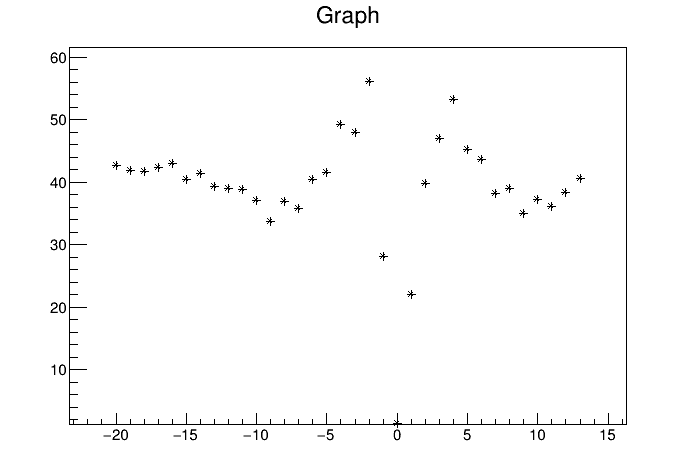

In [9]:
# gr = ROOT.TMultiGraph()
gr = ROOT.TGraph(34,deltaR,np.array(fmean))
gr.Draw('AP*')
# gr.Add(g60,'AP*')
c1.Draw()